In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_forest=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
dataset_forest.drop([122,123],inplace=True,axis=0)
dataset_forest.reset_index(inplace=True)
dataset_forest.drop('index',axis=1,inplace=True)

In [4]:
dataset_forest.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


# Exploratory data analysis

###  Data preprocessing and clearning Opertaion

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check outlier and fixed it


In [5]:
dataset_forest.loc[:122,'region']='bejaia'
dataset_forest.loc[122:,'region']='Sidi-Bel Abbes'

In [6]:
dataset_forest.shape

(244, 15)

In [7]:
dataset_forest.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [8]:
dataset_forest.rename(columns={' RH':'RH',' Ws':'Ws','Rain ':'Rain','Classes  ':'Classes'},inplace=True)

In [9]:
dataset_forest['Classes']=dataset_forest['Classes'].str.strip()

In [10]:
dataset_forest.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
234,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire,Sidi-Bel Abbes
235,22,09,2012,33,64,13,0,88.9,26.1,106.3,7.1,32.4,13.7,fire,Sidi-Bel Abbes
236,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,Sidi-Bel Abbes
237,24,09,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire,Sidi-Bel Abbes
238,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire,Sidi-Bel Abbes
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [11]:
dataset_forest.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [12]:
dataset_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [13]:
dataset_forest.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            127
Classes          2
region           2
dtype: int64

In [14]:
dataset_forest.index[dataset_forest['DC']=='14.6 9']


Int64Index([165], dtype='int64')

In [15]:
dataset_forest.loc[165,'DC']=14.6

In [16]:
dataset_forest.loc[165,'FWI']=dataset_forest['FWI'].mode()[0]

In [17]:

dataset_forest.fillna(method='bfill', inplace=True)


In [18]:
dataset_forest['Temperature']=dataset_forest['Temperature'].astype(int)
dataset_forest['RH']=dataset_forest['RH'].astype(int)
dataset_forest['Ws']=dataset_forest['Ws'].astype(int)
dataset_forest['Rain']=dataset_forest['Rain'].astype(float)
dataset_forest['FFMC']=dataset_forest['FFMC'].astype(float)
dataset_forest['DMC']=dataset_forest['FFMC'].astype(float)
dataset_forest['DC']=dataset_forest['DC'].astype(float)
dataset_forest['ISI']=dataset_forest['ISI'].astype(float)
dataset_forest['BUI']=dataset_forest['BUI'].astype(float)
dataset_forest['FWI']=dataset_forest['FWI'].astype(float)

In [19]:
dataset_forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(7), int32(3), object(5)
memory usage: 25.9+ KB


In [20]:
dataset_forest['Date']=pd.to_datetime(dataset_forest[['day','month','year']])
dataset_forest.drop(['day','month','year'],axis=1,inplace=True)

###  Statistical Information of the  Dataset

In [21]:
dataset_forest.describe().T



,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.774180,4.175318,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.664754,14.204824,1.1,6.000,12.25,22.525,68.0
FWI,244.0,7.008197,7.437383,0.0,0.700,4.20,11.375,31.1


In [22]:
dataset_forest.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'Date'],
      dtype='object')

#### Chcek the NaN or Null value

<AxesSubplot:>

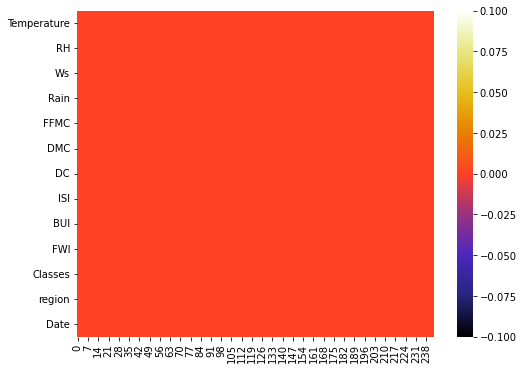

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset_forest.isna().transpose(),
            cmap='CMRmap')

In [24]:
numeric_features = [i for i in dataset_forest.columns if dataset_forest[i].dtype!='O']
categorical_features = [i for i in dataset_forest.columns if dataset_forest[i].dtype=='O']

In [25]:
numeric_features

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Date']

## Univariate Analysis

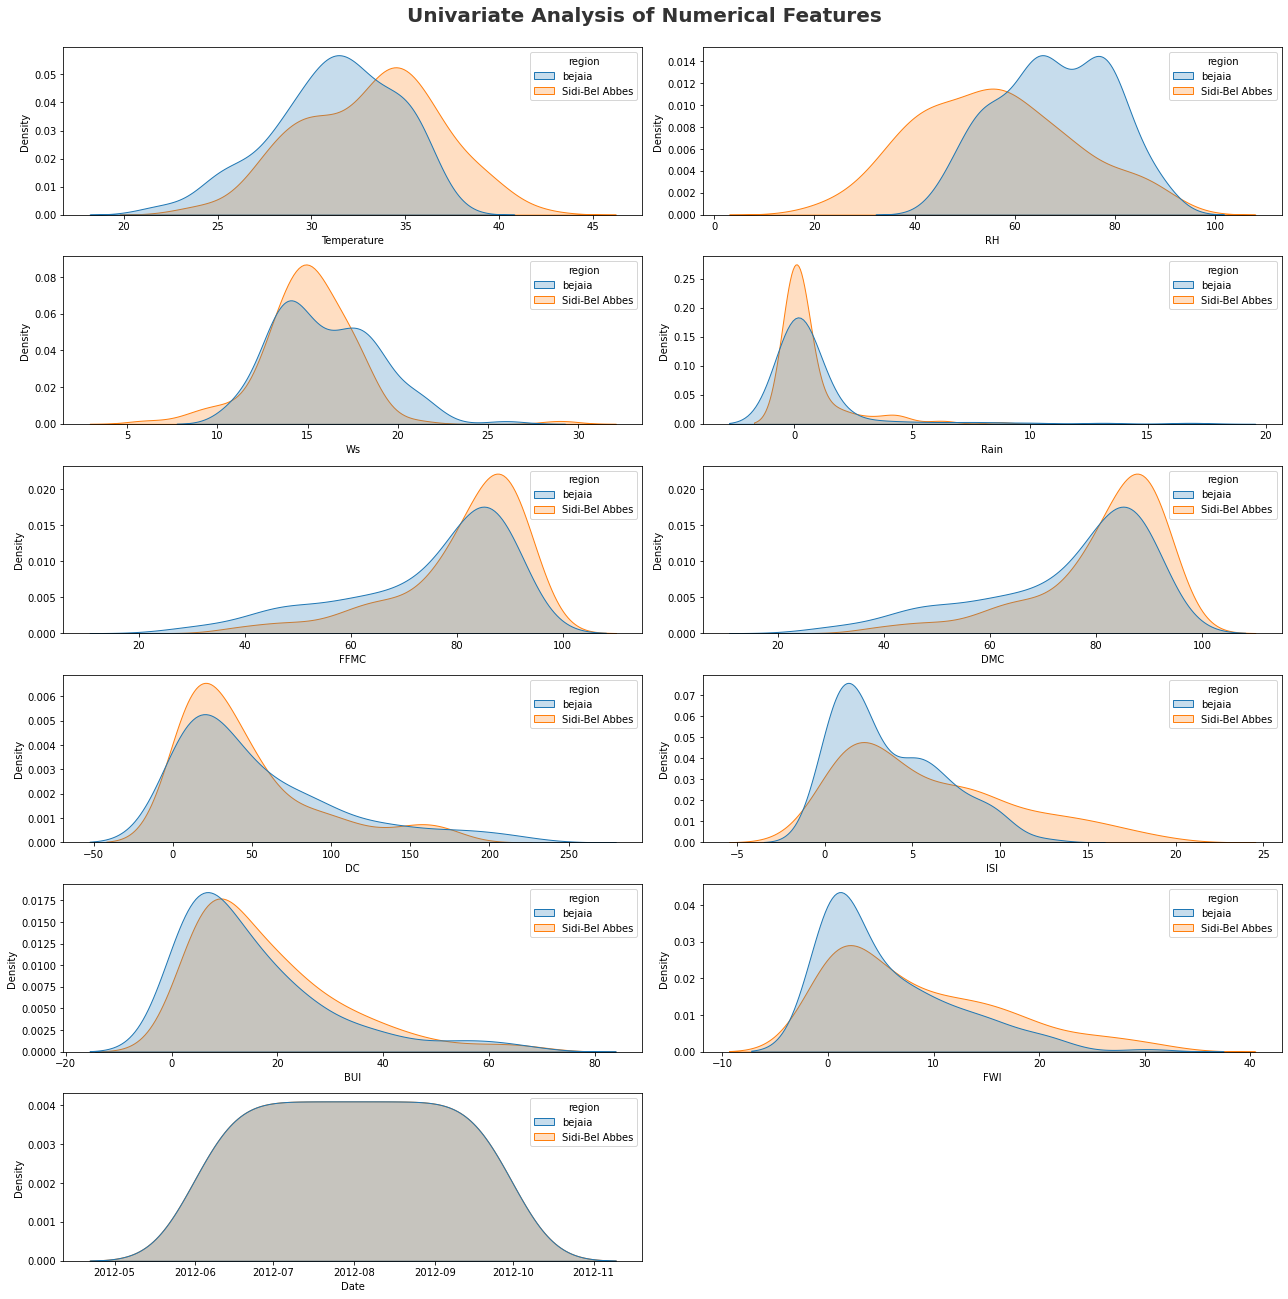

In [26]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x=dataset_forest[numeric_features[i]],shade=True,hue='region',data=dataset_forest)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

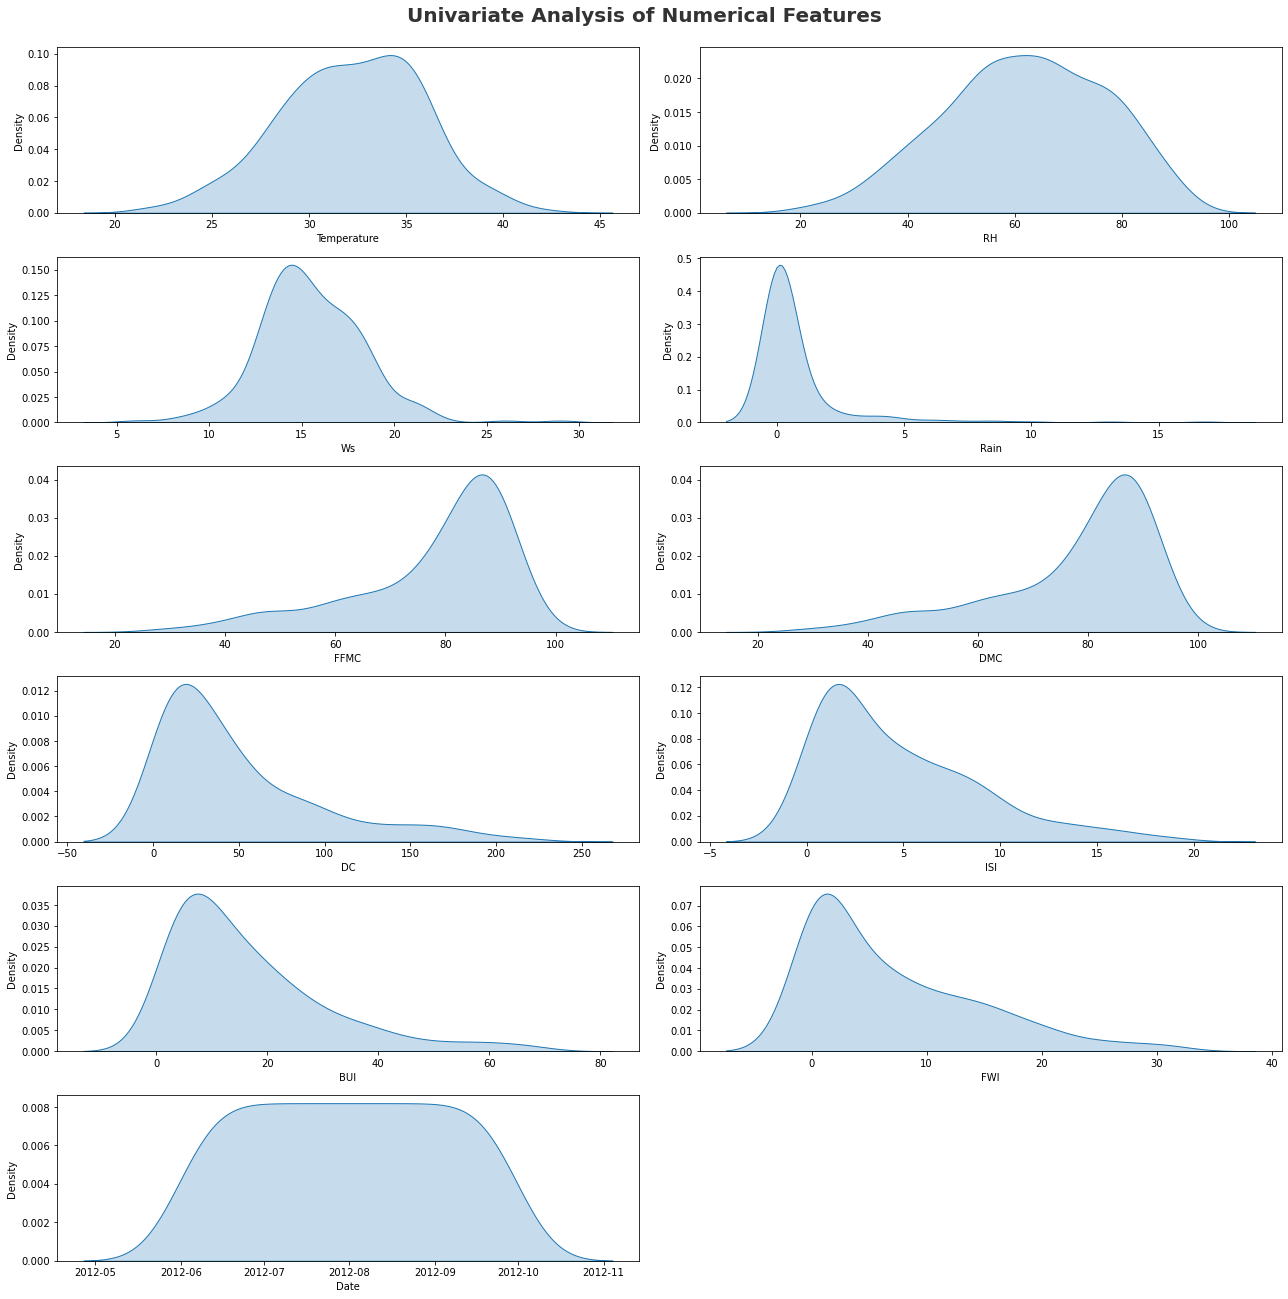

In [27]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x=dataset_forest[numeric_features[i]],shade=True,data=dataset_forest)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


### Observations:

#### Attribute Information:
- Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
- RH : Relative Humidity in %: 21 to 90
- Ws :Wind speed in km/h: 6 to 29
- Rain: total day in mm: 0 to 16.8
- FWI Components
- Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
- Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
- Drought Code (DC) index from the FWI system: 7 to 220.4
- Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
- Buildup Index (BUI) index from the FWI system: 1.1 to 68
- Fire Weather Index (FWI) Index: 0 to 31.1

#### Distribution Information:
- Temperature,RH,Ws is likely normal distribution but not fully normal distribution 
- FFMC,DMC data is left skewed distribution 
- DC,ISI,BUI,FWI data is right skewed distribution 
- Rain is likely log Normal distribution



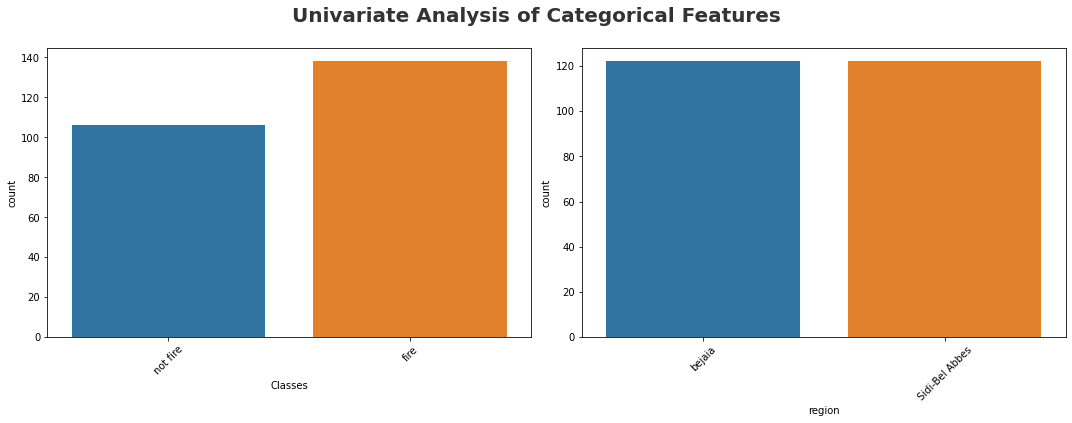

In [28]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=dataset_forest[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Multivariate Analysis

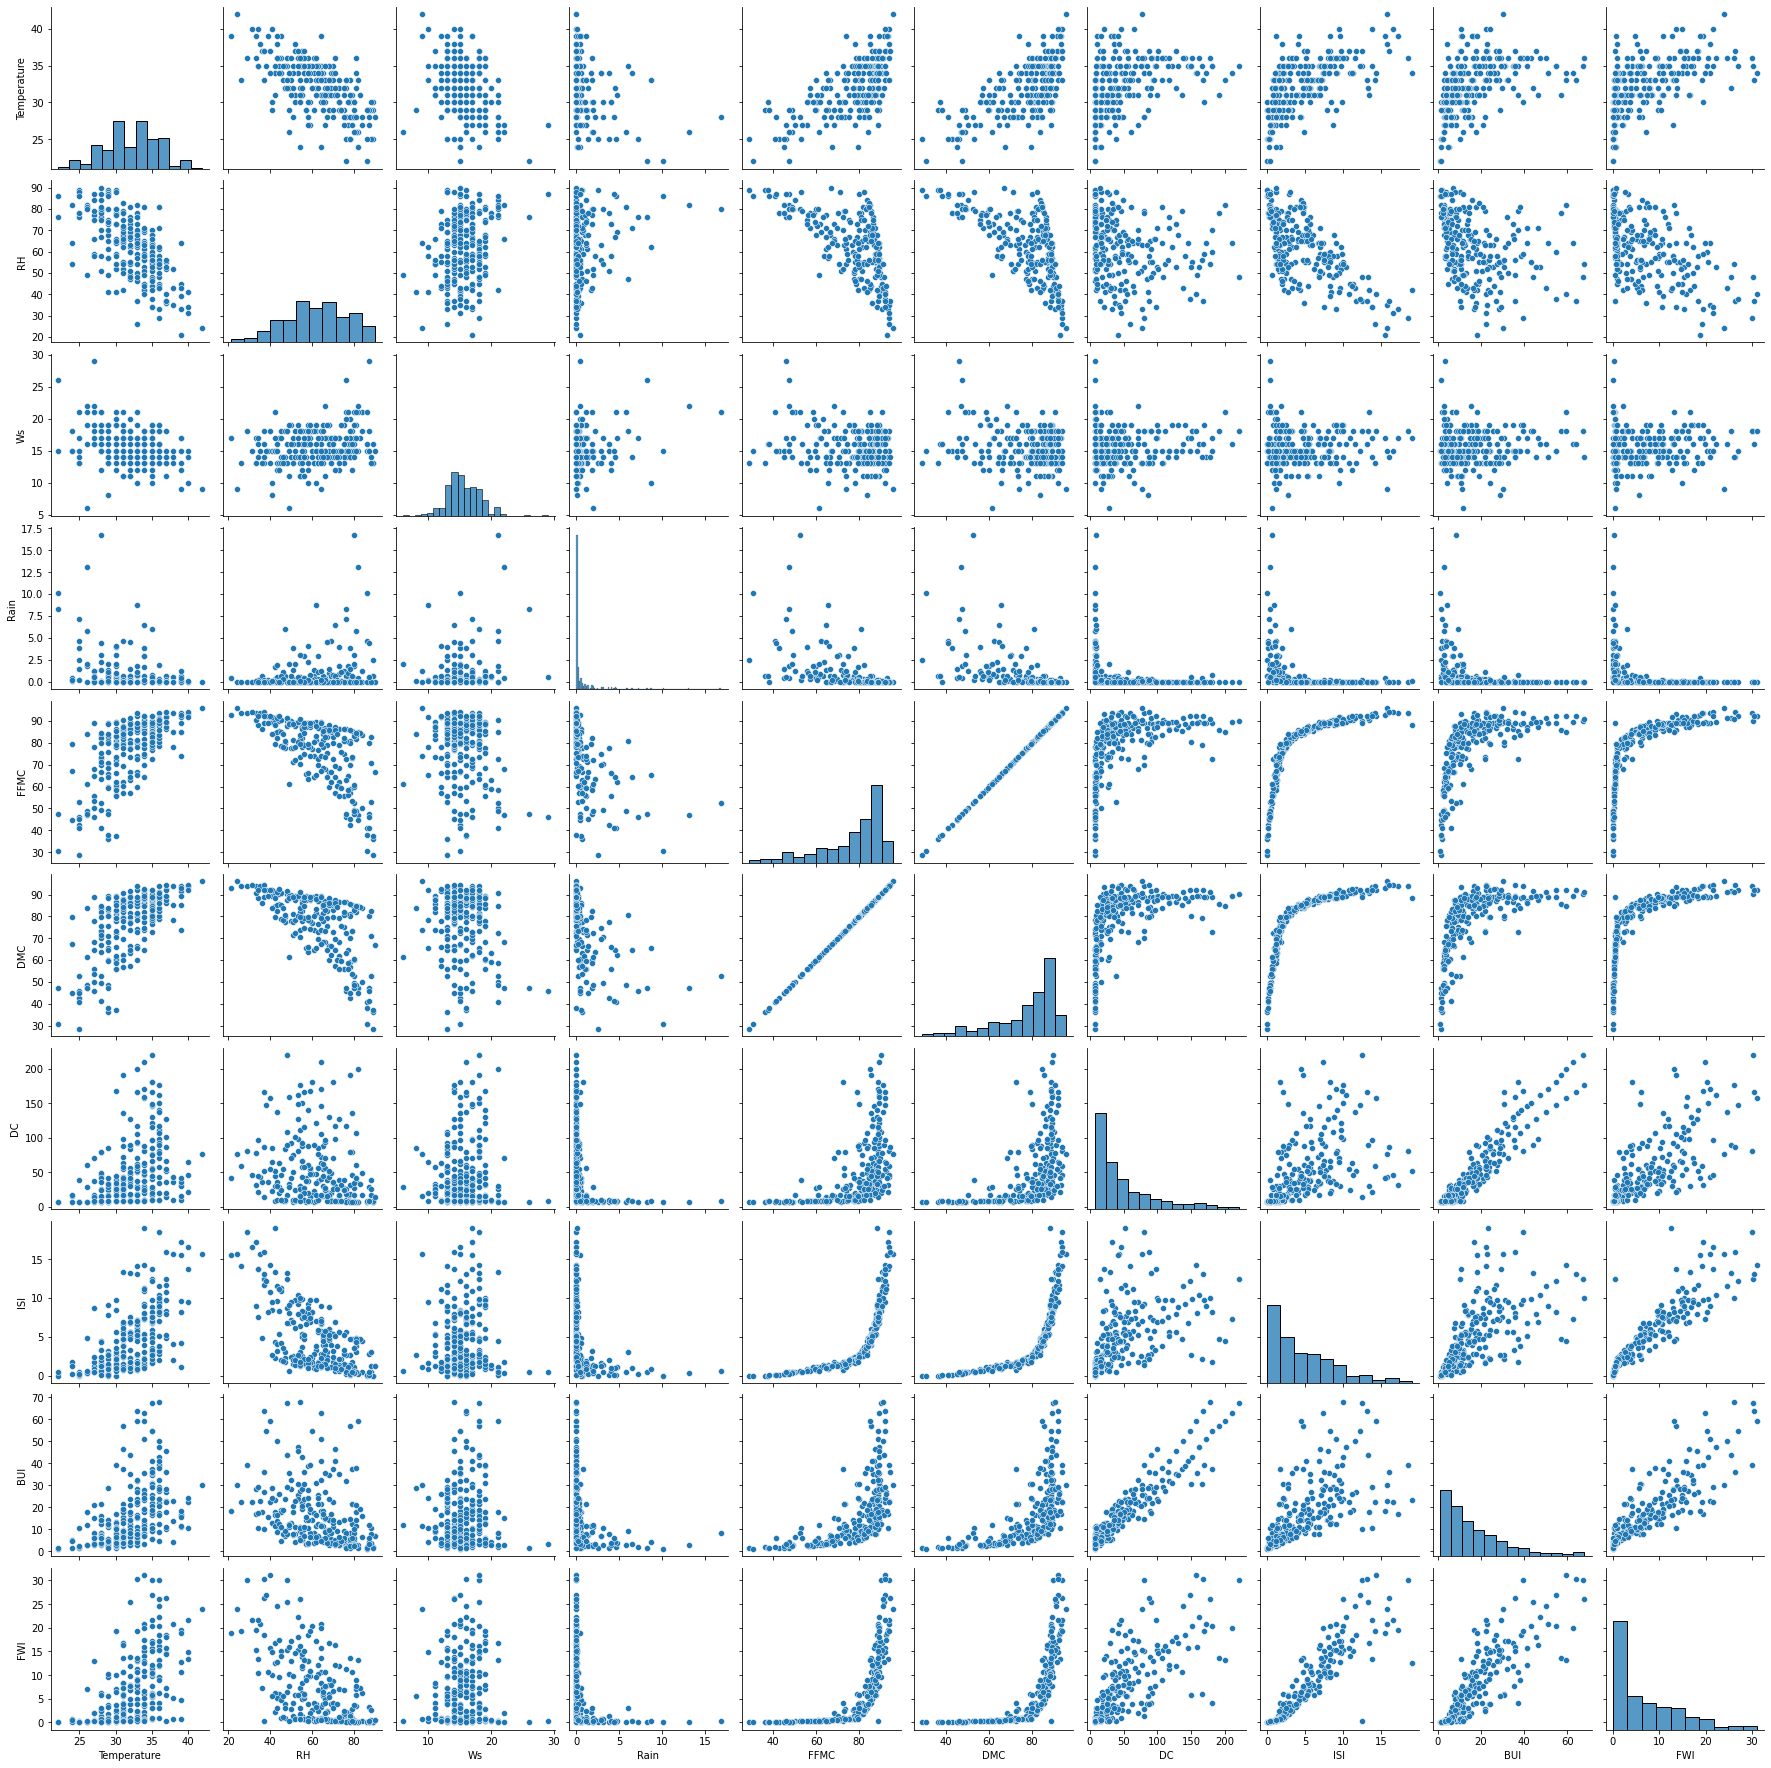

In [29]:
sns.pairplot(dataset_forest)

<AxesSubplot:>

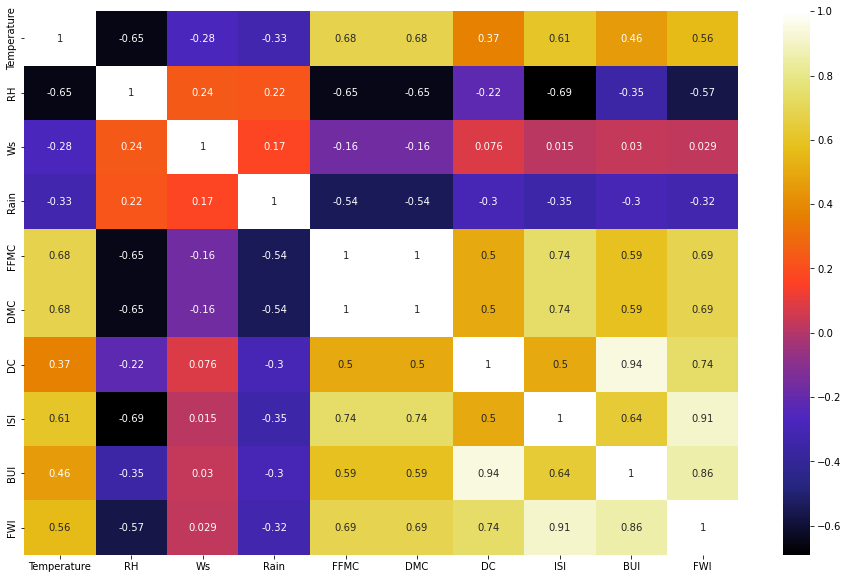

In [30]:
plt.figure(figsize = (16,10))
sns.heatmap(dataset_forest.corr(),cmap="CMRmap", annot=True)

### Observations:

- DC and BUI highly postive correlation
- DMC  and FFMS higly correlated

In [31]:
num_fea=['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI']

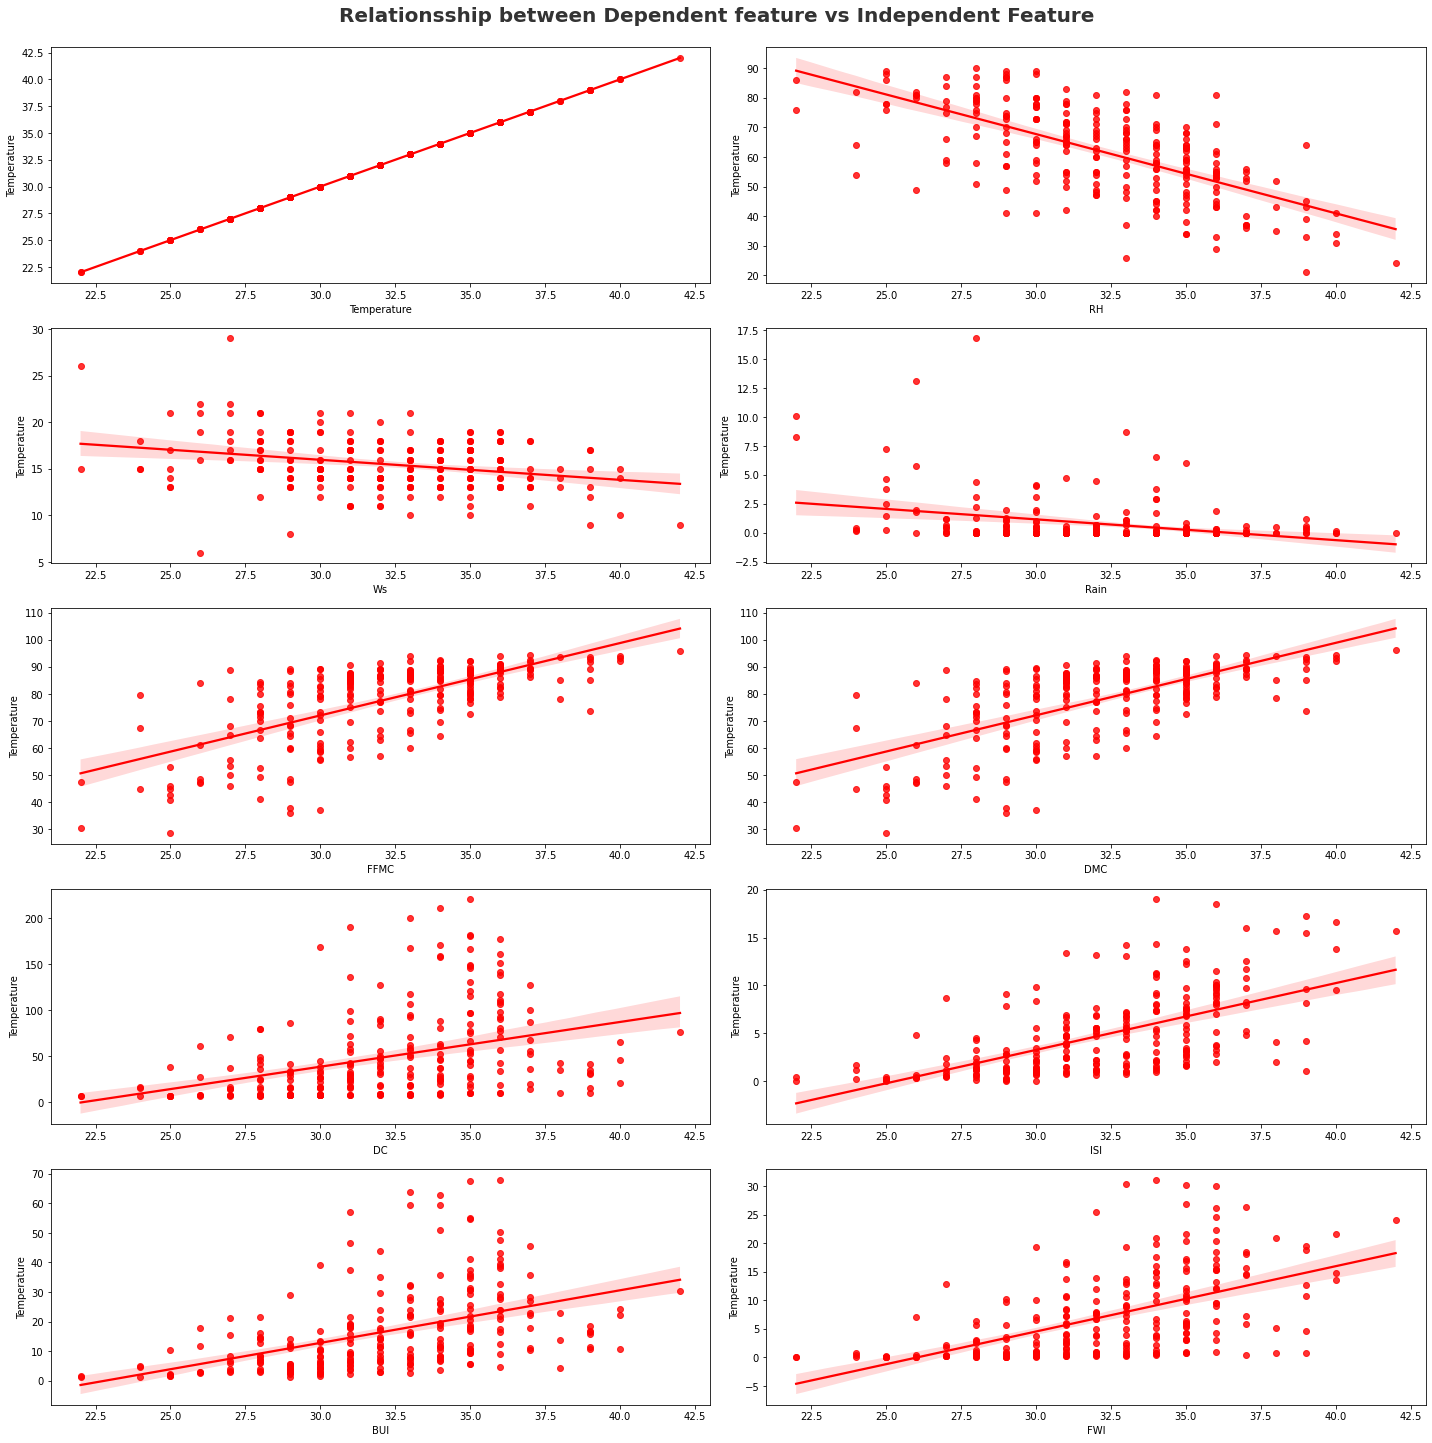

In [32]:
plt.figure(figsize=(20,20))
plt.suptitle('Relationsship between Dependent feature vs Independent Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0,len(num_fea)):
    
    plt.subplot(5, 2, i+1)
    sns.regplot(data=dataset_forest,x="Temperature",y=num_fea[i],color='r')
    plt.xlabel(numeric_features[i])
    plt.ylabel("Temperature")
    plt.tight_layout()


### Observations:

- Relative Humidity ,Wind speed,Rain shows negative correlation with temparture 
- Relative Humidity is strongly negative correlation with temparature
- Fine Fuel Moisture Code,Duff Moisture Code (DMC),Drought Code (DC),Initial Spread Index (ISI),Buildup Index (BUI),Fire Weather Index (FWI) all are positive correlation with Temperature.


<AxesSubplot:xlabel='Date', ylabel='Rain'>

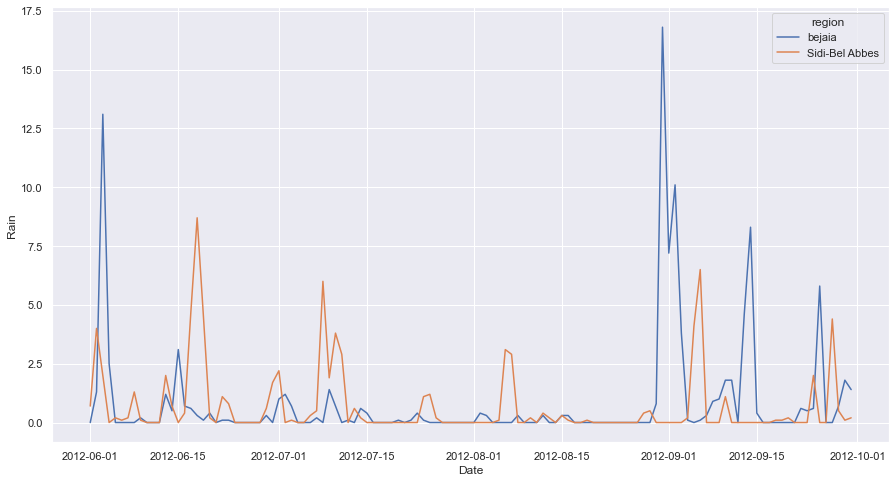

In [33]:

plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x='Date', y="Rain",
             hue="region",
             data=dataset_forest)

<AxesSubplot:xlabel='Date', ylabel='Temperature'>

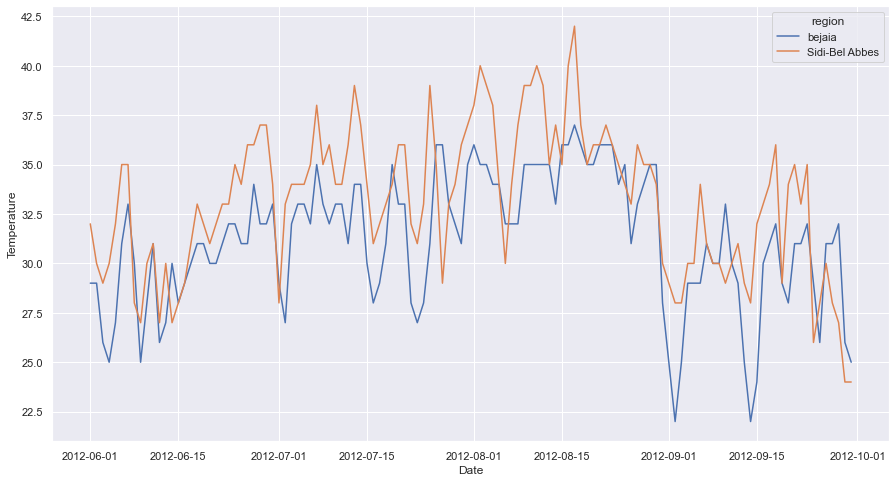

In [34]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x='Date', y="Temperature",
             hue="region",
             data=dataset_forest)

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

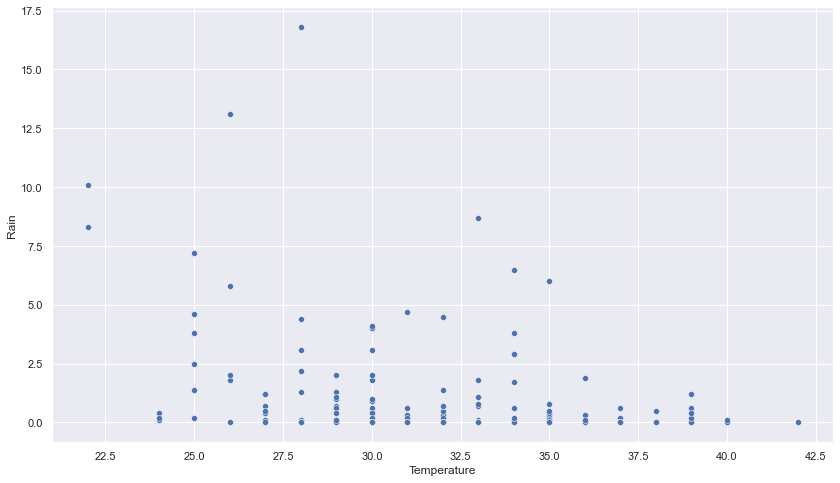

In [35]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Temperature',y='Rain',data=dataset_forest)

<AxesSubplot:xlabel='region', ylabel='Temperature'>

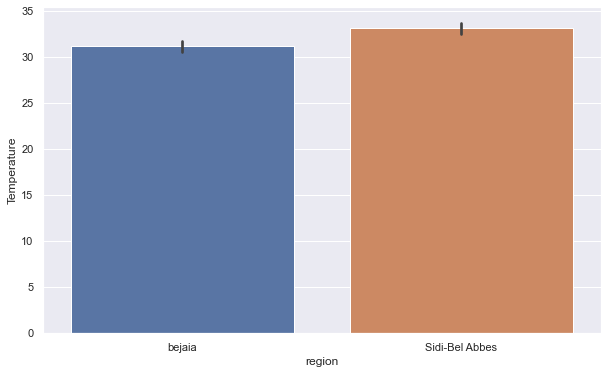

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='region',y='Temperature',data=dataset_forest)

In [37]:
dataset_forest.sort_values(by='Rain', ascending=False)[['Rain','region']].head(1)

,Rain,region
91,16.8,bejaia


In [38]:
dataset_forest.sort_values(by='Rain', ascending=True)[['Rain','region']].head(1)

,Rain,region
0,0.0,bejaia


In [39]:
dataset_forest.sort_values(by='Temperature', ascending=False)[['Temperature','region']].head(1)

,Temperature,region
199,42,Sidi-Bel Abbes


### Observations:

- Highest temperature in the Sidi-Bel Abbes region 42 Celsius degrees
- Highest Rain in the bejaia region 16.8 mm 
- Highest rainfall observed in the 1 week of September 
- Temperature suddenly fall down on the 1st weeek of September


### Handling Categorical Features

In [40]:
#dataset_forest['Classes']=dataset_forest['Classes'].map({'not fire':0,'fire':1})


In [41]:
#dataset_forest['region']=dataset_forest['region'].map({'Bejaia':0,'Sidi-Bel Abbes':1})
dataset_forest['region'].replace('bejaia',1,inplace=True)
dataset_forest['region'].replace('Sidi-Bel Abbes',0,inplace=True)


### Dropping unnecessary columns

In [42]:
dataset_forest=dataset_forest.drop(['Classes','Date'],axis=1)

### Outlier Check

<AxesSubplot:>

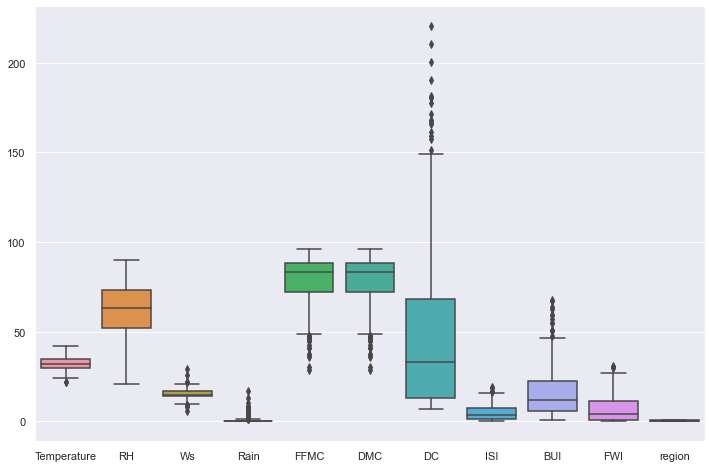

In [43]:
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset_forest)

### Handleing the Outlier 

In [44]:
def Handle_outliers(dataset,column):
    IQR=dataset[column].quantile(0.75)-dataset[column].quantile(0.25)
    lower_fence=dataset[column].quantile(0.25)-(IQR*1.5)
    upper_fence=dataset[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("____________________________________________")
    dataset_forest.loc[dataset[column]<=lower_fence,column]=lower_fence
    dataset_forest.loc[dataset[column]>=upper_fence,column]=upper_fence 

In [45]:
columns=dataset_forest.columns

In [46]:
for col in columns:
    Handle_outliers(dataset_forest,col)

IQR: 5.0
Lower Fence Temperature: 22.5
Upper Fence Temperature: 42.5
____________________________________________
IQR: 21.25
Lower Fence RH: 20.125
Upper Fence RH: 105.125
____________________________________________
IQR: 3.0
Lower Fence Ws: 9.5
Upper Fence Ws: 21.5
____________________________________________
IQR: 0.5
Lower Fence Rain: -0.75
Upper Fence Rain: 1.25
____________________________________________
IQR: 16.224999999999994
Lower Fence FFMC: 47.73750000000001
Upper Fence FFMC: 112.63749999999999
____________________________________________
IQR: 16.224999999999994
Lower Fence DMC: 47.73750000000001
Upper Fence DMC: 112.63749999999999
____________________________________________
IQR: 54.87500000000001
Lower Fence DC: -69.03750000000002
Upper Fence DC: 150.46250000000003
____________________________________________
IQR: 5.9
Lower Fence ISI: -7.450000000000001
Upper Fence ISI: 16.150000000000002
____________________________________________
IQR: 16.525
Lower Fence BUI: -18.78749999

<AxesSubplot:>

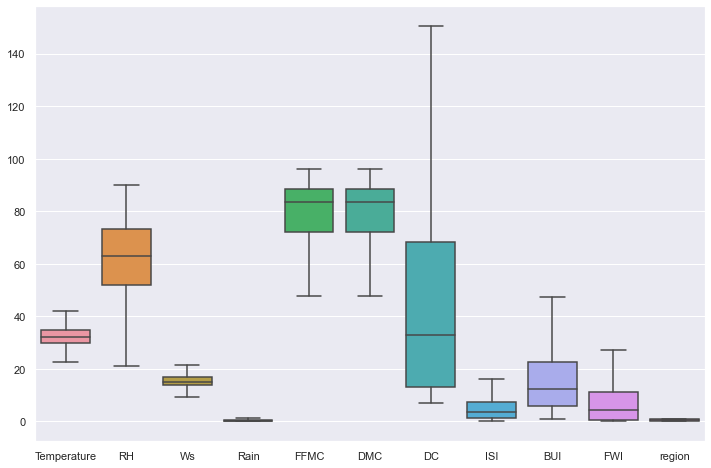

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(data=dataset_forest)

## Predictive Analysis-Linear Regression

In [48]:
## Independent Feature 
X= pd.DataFrame(dataset_forest,columns=['RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
'region'])

In [49]:

#y=pd.DataFrame(dataset_forest,columns=['Temperature'])
y=dataset_forest['Temperature']

In [50]:
y.shape

(244,)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [53]:
X_train.shape

(170, 10)

In [54]:
X_test.shape

(74, 10)

In [55]:
y_train.shape

(170,)

In [56]:
y_test.shape

(74,)

In [57]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
39,69.0,13.0,0.7,66.6000,66.6000,9.3000,1.1,5.8000,0.5,1.0
87,82.0,21.0,0.0,84.9000,84.9000,150.4625,4.4,47.3125,13.2,1.0
169,68.0,15.0,0.0,86.1000,86.1000,51.6000,5.2,23.9000,9.1,0.0
232,41.0,9.5,0.1,83.9000,83.9000,86.0000,2.7,28.9000,5.6,0.0
144,59.0,16.0,0.8,74.2000,74.2000,8.3000,1.6,6.7000,0.8,0.0
...,...,...,...,...,...,...,...,...,...,...
64,69.0,13.0,0.0,85.0000,85.0000,19.8000,4.0,8.2000,3.9,1.0
15,89.0,13.0,0.7,47.7375,47.7375,7.6000,0.0,2.2000,0.0,1.0
228,51.0,13.0,0.0,88.7000,88.7000,50.2000,6.9,17.8000,9.8,0.0
125,64.0,14.0,0.0,79.4000,79.4000,15.4000,2.2,5.6000,1.0,0.0


In [58]:
y_train

39     33.0
87     33.0
169    33.0
232    29.0
144    33.0
       ... 
64     34.0
15     29.0
228    32.0
125    30.0
9      28.0
Name: Temperature, Length: 170, dtype: float64

In [59]:
X_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
162,56.0,15.0,1.25,74.8,74.8,9.5,1.6,6.8,0.8,0.0
60,64.0,17.0,0.00,87.2,87.2,145.7,6.8,41.2,15.7,1.0
61,45.0,14.0,0.00,78.8,78.8,10.2,2.0,4.7,0.9,1.0
63,63.0,14.0,0.30,76.6,76.6,10.0,1.7,5.5,0.8,1.0
69,59.0,17.0,0.00,87.4,87.4,57.0,6.9,17.9,9.9,1.0
...,...,...,...,...,...,...,...,...,...,...
142,55.0,14.0,0.00,86.2,86.2,18.4,5.0,8.2,4.9,0.0
32,76.0,20.0,0.70,63.1,63.1,9.2,1.3,3.0,0.5,1.0
242,54.0,18.0,0.10,79.7,79.7,15.2,1.7,5.1,0.7,0.0
7,73.0,15.0,0.00,86.6,86.6,38.3,5.6,13.5,7.1,1.0


In [60]:
y_train

39     33.0
87     33.0
169    33.0
232    29.0
144    33.0
       ... 
64     34.0
15     29.0
228    32.0
125    30.0
9      28.0
Name: Temperature, Length: 170, dtype: float64

### Standardize features

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()

In [63]:
X_train=scaler.fit_transform(X_train)

In [64]:
X_test=scaler.transform(X_test)

In [65]:
X_train

array([[ 0.46820243, -0.87856963,  0.79682971, ..., -0.80798744,
        -0.85216625,  1.02381286],
       [ 1.32761054,  2.22494907, -0.70353003, ...,  2.40150718,
         0.84610941,  1.02381286],
       [ 0.40209411, -0.10268996, -0.70353003, ...,  0.59139474,
         0.29784719, -0.976741  ],
       ...,
       [-0.72174726, -0.87856963, -0.70353003, ...,  0.11977975,
         0.39145293, -0.976741  ],
       [ 0.13766085, -0.4906298 , -0.70353003, ..., -0.82345023,
        -0.785305  , -0.976741  ],
       [ 1.12928559, -1.26650947, -0.70353003, ..., -0.2822527 ,
        -0.79867725,  1.02381286]])

In [66]:
X_test

array([[-0.39120568, -0.10268996,  1.9756838 , -0.23217233, -0.23217233,
        -0.87605935, -0.73822061, -0.73067351, -0.8120495 , -0.976741  ],
       [ 0.13766085,  0.67318972, -0.70353003,  0.69420982,  0.69420982,
         2.25780324,  0.52172151,  1.92892577,  1.18041564,  1.02381286],
       [-1.11839716, -0.4906298 , -0.70353003,  0.06666062,  0.06666062,
        -0.85995286, -0.64130198, -0.89303277, -0.79867725,  1.02381286],
       [ 0.07155253, -0.4906298 , -0.06051871, -0.0976975 , -0.0976975 ,
        -0.86455471, -0.71399095, -0.83118162, -0.8120495 ,  1.02381286],
       [-0.19288073,  0.67318972, -0.70353003,  0.70915147,  0.70915147,
         0.21688098,  0.54595116,  0.12751114,  0.40482518,  1.02381286],
       [-0.58953063,  0.28524988, -0.70353003,  0.86603876,  0.86603876,
         2.36738489,  1.39398912,  2.40150718,  2.06298409,  1.02381286],
       [-0.58953063,  1.4490694 , -0.70353003,  0.84362629,  0.84362629,
         1.17406662,  1.2970705 ,  0.59139474

### Model Training 

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
linear_regression = LinearRegression()

In [69]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [70]:
print(linear_regression.coef_)

[-0.58608503 -0.58415007  0.71865037  0.9620662   0.9620662   0.73403022
  0.89132729 -0.21252103 -0.61732261 -0.11579036]


In [71]:
print(linear_regression.intercept_)

32.129411764705885


### Prediction of Test Data

In [72]:
reg_pred=linear_regression.predict(X_test)

In [73]:
reg_pred

array([32.86040048, 33.35078468, 32.05560155, 31.43098613, 32.95838582,
       34.54686667, 33.82411536, 33.9293636 , 31.99674389, 33.15183735,
       33.66159133, 28.09932634, 34.70835035, 30.97613578, 33.49474853,
       32.28452326, 33.72907845, 27.90673362, 36.16190736, 34.07028365,
       32.70645744, 34.05016381, 33.53367685, 33.05715892, 35.90410323,
       28.48068086, 32.23550574, 32.76812917, 27.39112922, 32.82192205,
       26.36488837, 25.46468148, 33.95591659, 33.24595543, 33.09020903,
       29.93581638, 28.21377763, 32.34644512, 26.23716185, 35.33173598,
       33.09359268, 33.99537777, 33.79545399, 31.52586562, 36.47933116,
       34.07965382, 26.92074196, 34.84658655, 33.82778543, 29.47971012,
       31.41616584, 32.65328214, 35.25073502, 32.01981921, 30.92568048,
       29.75430849, 32.63761372, 35.78810552, 32.02774851, 33.43063132,
       32.18141305, 33.20962846, 31.31227552, 26.06205161, 31.15563456,
       36.3982811 , 30.09793896, 29.34862612, 34.70208981, 33.36

In [74]:
residuals=y_test-reg_pred

### Assumptions Of Linear Regression

Text(0, 0.5, 'Test Predicted Data')

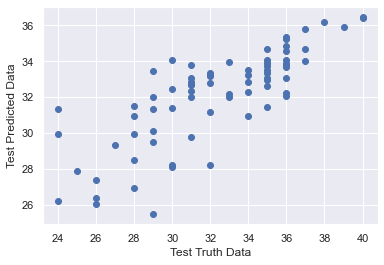

In [75]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

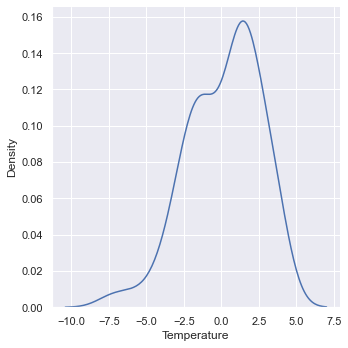

In [76]:
sns.displot(residuals,kind="kde")

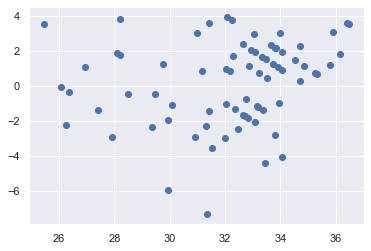

In [77]:
plt.scatter(reg_pred,residuals)

### Performance Metric

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=reg_pred)
mse = mean_squared_error(y_true=y_test,y_pred=reg_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=reg_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 2.028608277888271
MSE: 5.791761258126283
RMSE: 2.4066078322249105


### R-Squared 

In [79]:
from sklearn.metrics import r2_score

In [80]:
s=r2_score(y_test,reg_pred)

In [81]:
print(s)

0.6128503723160175


### Adjusted  R-Squared 

In [82]:
1 - (1-s)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5513980504614171

## Predictive Analysis-Ridge Regression

In [83]:
from sklearn.linear_model import Ridge

In [84]:
ridge=Ridge()

In [85]:
ridge.fit(X_train,y_train)

Ridge()

In [86]:
print(ridge.coef_)

[-0.6127334  -0.5763465   0.68014528  0.94713931  0.94713931  0.64472925
  0.78716571 -0.15774871 -0.51142079 -0.10952851]


In [87]:
print(ridge.intercept_)

32.129411764705885


In [88]:
ridge_pred = ridge.predict(X_test)

In [89]:
ridge_residual = ridge_pred-y_test

### Assumptions Of Ridge Regression

Text(0, 0.5, 'Test Predicted Data')

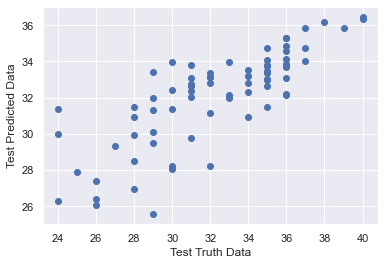

In [90]:
plt.scatter(y_test,ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

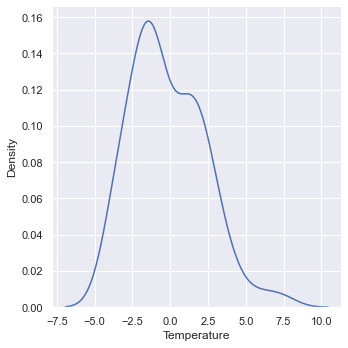

In [91]:
sns.displot(ridge_residual,kind="kde")

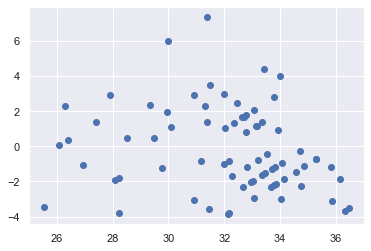

In [92]:
plt.scatter(ridge_pred,ridge_residual)

### Performance Metric for Ridge Regression

In [93]:
Ridge_mae = mean_absolute_error(y_true=y_test,y_pred=ridge_pred)
Ridge_mse = mean_squared_error(y_true=y_test,y_pred=ridge_pred) #default=True
Ridge_rmse = mean_squared_error(y_true=y_test,y_pred=ridge_pred,squared=False)

print("Ridge MAE:",Ridge_mae)
print("Ridge MSE:",Ridge_mse)
print("Ridge RMSE:",Ridge_rmse)


Ridge MAE: 2.0281015088738434
Ridge MSE: 5.788745331230059
Ridge RMSE: 2.4059811577047023


### R-Squared for Ridge Regression

In [94]:
Ridge_score=r2_score(y_test,ridge_pred)

In [95]:
print(Ridge_score)

0.6130519716090403


### Adjusted  R-Squared 

In [96]:
1 - (1-Ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5516316496422213

##  Predictive Analysis-Lasso Regression

In [97]:
from sklearn.linear_model import Lasso

In [98]:
lasso = Lasso()

In [99]:
lasso.fit(X_train,y_train)

Lasso()

In [100]:
print(lasso.coef_)

[-0.5806727  -0.         -0.          0.99862772  0.          0.
  0.          0.          0.         -0.        ]


In [101]:
print(lasso.intercept_)

32.129411764705885


In [102]:
lasso_pred=lasso.predict(X_test)

### Assumptions Of Lasso Regression

Text(0, 0.5, 'Test Predicted Data')

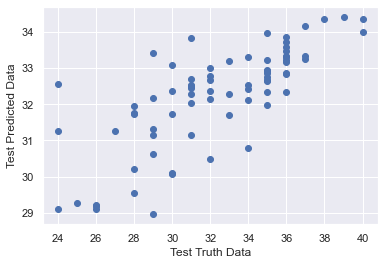

In [103]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

### Performance Metric for Lasso Regression

In [104]:
Lasso_mae = mean_absolute_error(y_true=y_test,y_pred=lasso_pred)
Lasso_mse = mean_squared_error(y_true=y_test,y_pred=lasso_pred) #default=True
Lasso_rmse = mean_squared_error(y_true=y_test,y_pred=lasso_pred,squared=False)

print("Ridge MAE:",Lasso_mae)
print("Ridge MSE:",Lasso_mse)
print("Ridge RMSE:",Lasso_rmse)


Ridge MAE: 2.4915426426819764
Ridge MSE: 8.764566746430113
Ridge RMSE: 2.960501097184413


### R-Squared for Lasso Regression

In [105]:
Lasso_score=r2_score(y_test,lasso_pred)

In [106]:
print(Lasso_score)

0.4141335249392548


### Adjusted  R-Squared 

In [107]:
1 - (1-Lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3211388463581841

##  Predictive Analysis-Elastric-Net Regression

In [108]:
from sklearn.linear_model import ElasticNet

In [109]:
elastric = ElasticNet()

In [110]:
elastric.fit(X_train,y_train)

ElasticNet()

In [111]:
elastric_pred=elastric.predict(X_test)

In [112]:
print(elastric.coef_)

[-0.56567042 -0.12386299 -0.          0.49791789  0.49794988  0.
  0.21027424  0.04722     0.08041991 -0.        ]


In [113]:
print(elastric.intercept_)

32.129411764705885


Text(0, 0.5, 'Test Predicted Data')

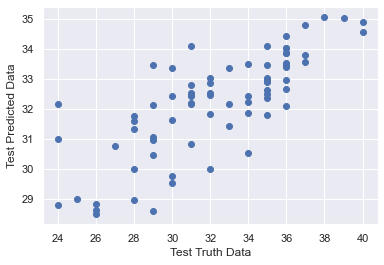

In [114]:
plt.scatter(y_test,elastric_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

### Performance Metric for Elastric  Regression

In [115]:
elastric_mae = mean_absolute_error(y_true=y_test,y_pred=elastric_pred)
elastric_mse = mean_squared_error(y_true=y_test,y_pred=elastric_pred) #default=True
elastric_rmse = mean_squared_error(y_true=y_test,y_pred=elastric_pred,squared=False)

print("Ridge MAE:",elastric_mae)
print("Ridge MSE:",elastric_mse)
print("Ridge RMSE:",elastric_rmse)

Ridge MAE: 2.371033169787541
Ridge MSE: 7.811216578209378
Ridge RMSE: 2.7948553769755917


### R-Squared for Elastric Regression

In [116]:
elastric_score=r2_score(y_test,elastric_pred)

In [117]:
print(elastric_score)

0.4778601093458996


### Adjusted  R-Squared 

In [118]:
1 - (1-elastric_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.39498076162302653

## Comparing all the predicted Model

In [119]:
DF_Model=pd.DataFrame({'Actual':y_test,'Linear':reg_pred,'Ridge':ridge_pred,'Lasso':lasso_pred,'Elastric-Net':elastric_pred})

In [120]:
DF_Model.head()

,Actual,Linear,Ridge,Lasso,Elastric-Net
162,34.0,32.860400,32.823874,32.124721,31.877176
60,35.0,33.350785,33.339838,32.742733,32.955216
61,36.0,32.055602,32.123186,32.845404,32.647964
63,35.0,31.430986,31.456961,31.990300,31.797726
69,35.0,32.958386,32.954730,32.949591,33.014733
